# Small Image Classification Using Convolutional Neural Network (CNN)

https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb

Video source: https://www.youtube.com/watch?v=7HPwo4wnJeA&t=694s

In [4]:
import tensorflow as tf
from tensorflow .keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

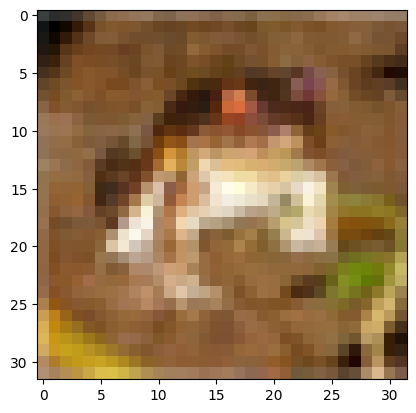

In [9]:
plt.imshow(X_train[0])

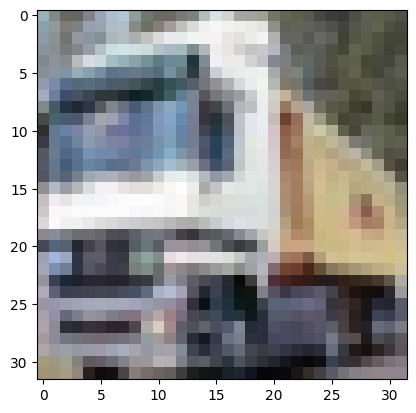

In [10]:
plt.imshow(X_train[1])

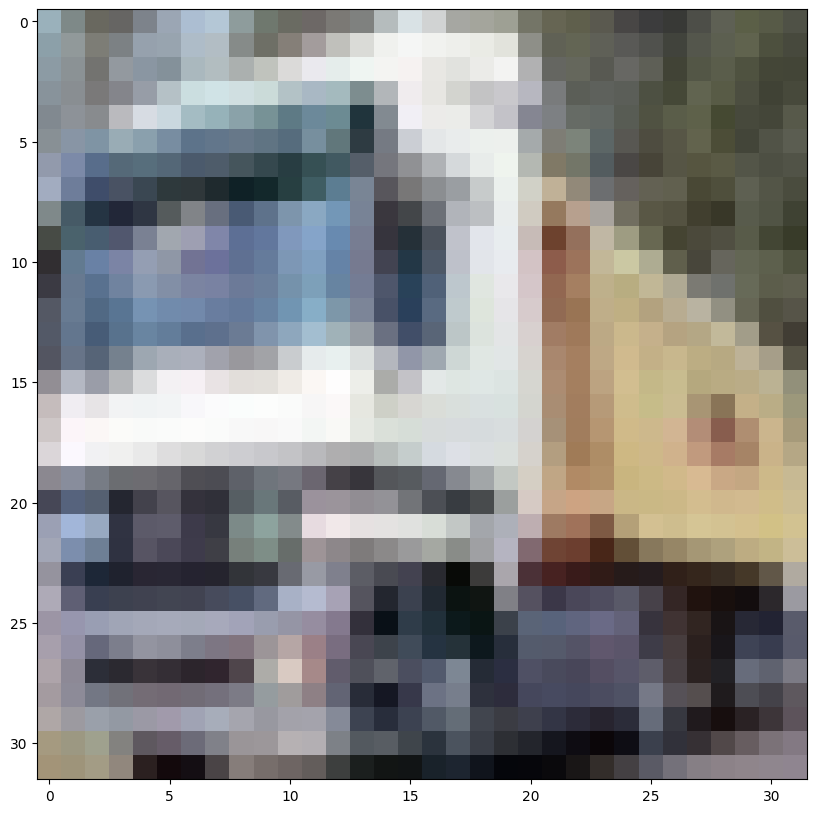

In [11]:
plt.figure(figsize=(15,10))
plt.imshow(X_train[1])

In [14]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train=y_train.reshape(-1,)

In [19]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
classes[9]

'truck'

In [21]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

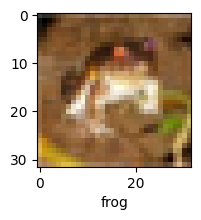

In [22]:
plot_sample(X_train,y_train,0)

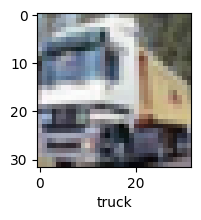

In [23]:
plot_sample(X_train,y_train,1)

In [25]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [26]:
X_train=X_train/255
X_test=X_test/255

### Build ANN

In [28]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5


2025-01-07 08:24:48.445895: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.3063 - loss: 1.9242
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.4190 - loss: 1.6469
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.4535 - loss: 1.5455
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4766 - loss: 1.4912
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4942 - loss: 1.4367


In [30]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4832 - loss: 1.4616


[1.466488242149353, 0.47839999198913574]

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_class=[np.argmax(element)for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.52      0.53      1000
           1       0.59      0.62      0.61      1000
           2       0.48      0.17      0.25      1000
           3       0.39      0.20      0.26      1000
           4       0.38      0.49      0.43      1000
           5       0.38      0.45      0.41      1000
           6       0.53      0.56      0.54      1000
           7       0.69      0.37      0.48      1000
           8       0.49      0.74      0.59      1000
           9       0.42      0.67      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.46     10000
weighted avg       0.49      0.48      0.46     10000



In [ ]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [35]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10


2025-01-08 07:53:49.878848: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.3833 - loss: 1.6990
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5962 - loss: 1.1523
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6508 - loss: 0.9946
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6849 - loss: 0.9089
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7160 - loss: 0.8321
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7269 - loss: 0.7851
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7452 - loss: 0.7376
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7560 - loss: 0.6972
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7678 - loss: 0.6676
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7840 - loss: 0.6219


In [37]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7098 - loss: 0.8869


[0.8954060673713684, 0.7063000202178955]

In [38]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

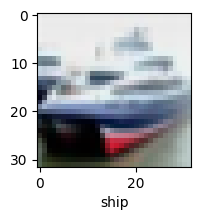

In [39]:
y_test=y_test.reshape(-1)
plot_sample(X_test,y_test,1)

In [40]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[8.50173738e-03, 1.25062224e-05, 2.62830080e-03, 9.48654056e-01,
        2.46493350e-04, 2.84802616e-02, 9.63334460e-03, 1.93093365e-05,
        1.76617561e-03, 5.78035397e-05],
       [3.69369122e-03, 1.17561877e-01, 1.11850040e-05, 3.43266788e-06,
        1.02474278e-05, 2.10056896e-07, 1.84824712e-05, 3.86459902e-07,
        8.73641968e-01, 5.05833514e-03],
       [7.59300590e-02, 3.64432007e-01, 3.66367586e-03, 8.29145964e-03,
        6.38755364e-03, 3.77561402e-04, 1.05568012e-02, 2.90482072e-03,
        2.67773241e-01, 2.59682834e-01],
       [9.72852349e-01, 6.39593042e-03, 3.79579281e-03, 3.44485306e-04,
        6.43946114e-04, 1.28712045e-05, 1.62971191e-04, 1.99167080e-05,
        1.53638450e-02, 4.07853106e-04],
       [3.47622624e-08, 1.90813407e-05, 1.52033987e-03, 1.30999452e-02,
        3.23699825e-02, 5.79622807e-04, 9.52352643e-01, 1.18581602e-05,
        4.56369307e-05, 8.69466078e-07]], dtype=float32)

介绍argmax函数

In [ ]:
np.argmax([5,12,1,2])

In [41]:
np.argmax(y_pred[0])

np.int64(3)

In [42]:
#预测值
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(6)]

In [44]:
#实际值
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

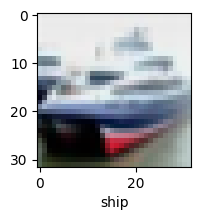

In [46]:
plot_sample(X_test,y_test,1)

In [45]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [47]:
classes[y_classes[1]]

'ship'

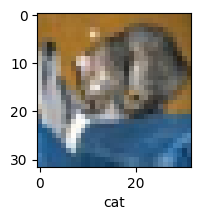

In [48]:
plot_sample(X_test,y_test,0)

In [49]:
classes[y_classes[0]]

'cat'

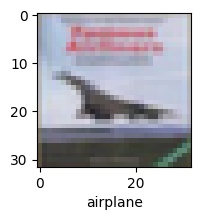

In [50]:
plot_sample(X_test,y_test,3)

In [51]:
classes[y_classes[3]]

'airplane'

In [52]:
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.84      0.81      0.83      1000
           2       0.63      0.54      0.58      1000
           3       0.55      0.51      0.53      1000
           4       0.60      0.72      0.66      1000
           5       0.67      0.54      0.60      1000
           6       0.69      0.84      0.76      1000
           7       0.74      0.77      0.76      1000
           8       0.79      0.80      0.79      1000
           9       0.79      0.80      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



Exercise
Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: Solution